In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imresize
from sklearn.utils import shuffle
from scipy.misc import imsave
import numpy as np
import os
import sys

# Test

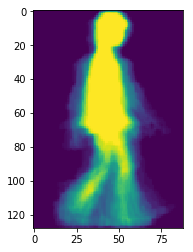

In [2]:
lists = np.ndarray((30,128,88))
path = '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq00/1000001'
dirs = os.listdir(path)
dirs = dirs[17:47]

for ii, image in enumerate(dirs):
    lists[ii, :, :] =plt.imread(os.path.join(path, image))
lists = 1/30*np.sum(lists, axis=0)
plt.imshow(lists)

# Create GEI function

In [3]:
import cv2

def generate_GEI(image_list):
    N = len(image_list)
    GEI_image = 1/N*np.sum(image_list, axis=0)
    
    return GEI_image

# Read CSV

In [4]:
from numpy import genfromtxt
import numpy as np
import os



# Define function generate_gait_cycle_list

In [5]:
def generate_gait_cycle_list(folder_path, csv_file):
    '''
    according csv file and folder path to generate image list of each subject in OULP dataset
    each image list includes the silhouettes inside of one gait cycle of each subject
    '''
    for subject in csv_file:
        images_list = np.ndarray((subject[3] - subject[2] + 1, 128, 88))
    
        subject_dir = str(subject[0])
        if len(subject_dir) != 7:
            subject_dir = '0' * (7 - len(subject_dir)) + subject_dir
                
        for ii, image_name in enumerate(range(subject[2], subject[3]+1)):
            image_name = str(image_name)
            if len(image_name) == 2:
                image_name = '0' + image_name
            elif len(image_name) == 1:
                image_name = '00' + image_name
            images_list[ii, :, :] = imread(os.path.join(folder_path, subject_dir, '00000{}.png'.format(image_name)))
            
        yield (images_list, subject_dir)

# Generate GEIs from random frames

In [6]:
def generate_image_list_from_start(folder_path, csv_file, start_from_frame, n_frames):
    '''
    Generate a image list from different start frames, these images can be used to generate GEIs.
    start_from_frame: set the start frame consist of IC-GEIs.
    n_frames: set the number of frames consist IC-GEIs.
    csv_file: OULP dataset provide the csv file that includes the end and start frames of one gait cycle.
    folder_path: the path saved the data
    '''
    for subject in csv_file:
        images_list = np.ndarray((n_frames, 128, 88))
        
        subject_dir = str(subject[0])
        if len(subject_dir) != 7:
            subject_dir = '0' * (7 - len(subject_dir)) + subject_dir
            
#         random_start_frame = np.random.randint(subject[2], subject[3]-n_frames, size=1)
        # 如果超出范围 则调整减少启始帧数
        if subject[2]+start_from_frame+n_frames > subject[3]:
            start_from_frame = start_from_frame - (subject[2]+start_from_frame+n_frames - subject[3])
        # 如果总帧数不够要求的帧数 则截取总帧数就可以
        if start_from_frame < 0:
            start_from_frame = 0
            n_frames = subject[3] - subject[2]
            
        for ii, image_name in enumerate(range(subject[2]+start_from_frame, subject[2]+start_from_frame+n_frames)):
            image_name = str(image_name)
            if len(image_name) == 2:
                image_name = '0' + image_name 
            elif len(image_name) == 1:
                image_name = '00' + image_name
            images_list[ii, :, :] = plt.imread(os.path.join(folder_path, subject_dir, '00000{}.png'.format(image_name)))
            
        yield (images_list, subject_dir)
#         yield (images_list, subject[2], subject[3])

In [7]:
def generate_save_path(folder_path, subject_dir, degree, n_frames):
    '''
    generate the save path of generated GEIs
    '''
    save_path = os.path.join(folder_path, subject_dir, '{}_{}_GEI_{}f'.format(subject_dir, str(degree), n_frames))
                             
    return save_path

In [8]:
IDList_55_gallery = genfromtxt(
    '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-55_Gallery.csv', delimiter=',', dtype=np.int32)
IDList_65_gallery = genfromtxt(
    '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-65_Gallery.csv', delimiter=',', dtype=np.int32)
IDList_75_gallery = genfromtxt(
    '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-75_Gallery.csv', delimiter=',', dtype=np.int32)
IDList_85_gallery = genfromtxt(
    '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-85_Gallery.csv', delimiter=',', dtype=np.int32)

IDList_55_probe = genfromtxt(
    '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-55_Probe.csv', delimiter=',', dtype=np.int32)
IDList_65_probe = genfromtxt(
    '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-65_Probe.csv', delimiter=',', dtype=np.int32)
IDList_75_probe = genfromtxt(
    '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-75_Probe.csv', delimiter=',', dtype=np.int32)
IDList_85_probe = genfromtxt(
    '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-85_Probe.csv', delimiter=',', dtype=np.int32)

print('length:',len(IDList_55_probe))
for row in IDList_55_probe:
    print(row)

length: 3714
[24  1 52 82]
[35  1 61 91]
[36  1 31 63]
[37  1 60 92]
[38  1 60 91]
[39  1 36 71]
[40  1 47 77]
[41  1 41 70]
[42  1 23 52]
[ 43   1  80 111]
[44  1 64 96]
[45  1 53 82]
[46  1 42 73]
[47  1 58 89]
[48  1 43 75]
[49  1 54 87]
[ 50   1  75 105]
[51  1 60 91]
[52  1 59 89]
[ 53   1  72 102]
[ 54   1  80 113]
[55  1 62 94]
[56  1 54 86]
[57  1 43 74]
[58  1 47 78]
[ 59   1  71 102]
[60  1 52 83]
[61  1 56 86]
[62  1 70 99]
[ 63   1  79 113]
[64  1 49 77]
[65  1 52 83]
[ 66   1  67 104]
[67  1 48 81]
[68  1 70 99]
[69  1 41 71]
[70  1 53 81]
[71  1 57 89]
[72  1 49 79]
[73  1 47 79]
[ 74   1  76 108]
[75  1 63 97]
[1000001       1     104     131]
[1000002       1      76     107]
[1000003       1      22      46]
[1000004       1      18      48]
[1000005       1      55      87]
[1000006       1      52      83]
[1000007       1      54      82]
[1000008       1      34      60]
[1000009       1      66      94]
[1000015       1      30      61]
[1000016       1      21   

[2000595       1      27      54]
[2000597       1      49      77]
[2000598       1      33      68]
[2000601       1      34      66]
[2000603       1      29      56]
[2000604       1      44      74]
[2000605       1      50      81]
[2000606       1      48      80]
[2000607       1      79     108]
[2000608       1      63      94]
[2000609       1      22      47]
[2000610       1      24      55]
[2000611       1      59      90]
[2000612       1      12      38]
[2000613       1      10      34]
[2000616       1      34      61]
[2000617       1      63      92]
[2000618       1      46      76]
[2000620       1      38      71]
[2000621       1      60      92]
[2000622       1      39      70]
[2000623       1      27      56]
[2000625       1      46      77]
[2000626       1      24      55]
[2000629       1      38      62]
[2000630       1      45      77]
[2000636       1      31      59]
[2000637       1      41      70]
[2000640       1      15      45]
[2000641      

[3000696       1      36      64]
[3000697       1      23      52]
[3000698       1      58      90]
[3000699       1      56      93]
[3000700       1      86     116]
[3000703       1      35      66]
[3000704       1      28      56]
[3000705       1      43      73]
[3000711       1      56      77]
[3000712       1      43      72]
[3000713       1      48      80]
[3000714       1      35      60]
[3000717       1      33      61]
[3000718       1      36      64]
[3000719       1      19      49]
[3000720       1      30      58]
[3000721       1      19      47]
[3000722       1      42      71]
[3000723       1      30      58]
[3000724       1      53      82]
[3000725       1      96     126]
[3000726       1      45      74]
[3000728       1      20      48]
[3000729       1      40      63]
[3000736       1      60      95]
[3000737       1      43      74]
[3000739       1       9      39]
[3000740       1       3      37]
[3000741       1      30      63]
[3000742      

[6019965       1      29      60]
[6020108       1      35      69]
[6020212       1      57      89]
[6020316       1      22      52]
[6020420       1      38      67]
[6020524       1      42      72]
[6020628       1      40      73]
[6020732       1      44      74]
[6020836       1      16      44]
[6020940       1      47      81]
[6021007       1      39      69]
[6021111       1      54      88]
[6021215       1      42      73]
[6021319       1      38      68]
[6021423       1      28      56]
[6021527       1      37      67]
[6021631       1      51      81]
[6021735       1      55      87]
[6021839       1      53      84]
[6021943       1      42      73]
[6022010       1      37      66]
[6022114       1      24      55]
[6022218       1      39      64]
[6022322       1      30      61]
[6022426       1      27      58]
[6022738       1      45      75]
[6022842       1      24      49]
[6022946       1      46      76]
[6023013       1      21      49]
[6023117      

[6138239       1      38      67]
[6138343       1      46      76]
[6138447       1      39      68]
[6138551       1      42      70]
[6138655       1      18      47]
[6138759       1      33      61]
[6138863       1      33      61]
[6138967       1      17      45]
[6139034       1      35      67]
[6139138       1      36      66]
[6139450       1      17      48]
[6139554       1      19      48]
[6139658       1      18      47]
[6139762       1      31      60]
[6139866       1      20      46]
[6139970       1      41      71]
[6140009       1      25      58]
[6150115       1      63      90]
[6150323       1      59      89]
[6150531       1      29      57]
[6150635       1      41      69]
[6150739       1      26      53]
[6151014       1      26      52]
[6151118       1      36      56]
[6151222       1      25      55]
[6151326       1      23      52]
[6151430       1       7      33]
[6151534       1      43      76]
[6151638       1      28      60]
[6151742      

[6272646       1      41      76]
[6272854       1      25      53]
[6273025       1      30      60]
[6273129       1      30      60]
[6273337       1      28      57]
[6273441       1      37      67]
[6273545       1      34      64]
[6273961       1      36      62]
[6274444       1      27      55]
[6274652       1      10      38]
[6274756       1      46      76]
[6274860       1      38      68]
[6274964       1      51      82]
[6275447       1      55      90]
[6275759       1      27      55]
[6275863       1      85     111]
[6275967       1      22      52]
[6276034       1      50      79]
[6276138       1     111     138]
[6276242       1      40      69]
[6276346       1      29      59]
[6276450       1      37      68]
[6276658       1      52      83]
[6276866       1      41      68]
[6276970       1      28      57]
[6277141       1      23      51]
[6277245       1      41      67]
[6277349       1      28      59]
[6277453       1      27      52]
[6277557      

[6453647       1      27      58]
[6453751       1      36      64]
[6453855       1      37      67]
[6454026       1      30      59]
[6454130       1       6      28]
[6454234       1      15      41]
[6454338       1       9      31]
[6454442       1      21      49]
[6454546       1      27      58]
[6454650       1      33      62]
[6454754       1      19      48]
[6454858       1      51      82]
[6454962       1      23      52]
[6455029       1      18      46]
[6455133       1      30      56]
[6455237       1      40      67]
[6455341       1      13      41]
[6455445       1      33      65]
[6455549       1      26      54]
[6455653       1      21      52]
[6455757       1      36      65]
[6455861       1      42      70]
[6455965       1      49      81]
[6456032       1      43      67]
[6456136       1      36      71]
[6456240       1       8      38]
[6456344       1      65     104]
[6456448       1      26      54]
[6456552       1      41      73]
[6456656      

In [9]:
# a pipeline used to generate different incomplete GEIs

# different number of frames 
for n_frames in [1, 3, 5, 8, 10, 13, 15, 18, 20]:
    # 14 different start frames
    for idx, strat_frame in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]):   
        for seq_num in [0, 1]:

            Or_folder_path = './OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq0{}'.format(seq_num)
            New_folder_path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-{}f_{}/Seq0{}'.format(n_frames,idx+1, seq_num)

            if seq_num == 0:    
                IDList = genfromtxt(
                        './OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-{}_Gallery.csv'.format(85)
                        , delimiter=',', dtype=np.int32)
            else:
                IDList = genfromtxt(
                        './OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-{}_Probe.csv'.format(85)
                        , delimiter=',', dtype=np.int32)

            image_list_tuple = generate_image_list_from_start(Or_folder_path, IDList, strat_frame, n_frames)
#             image_list_tuple = generate_gait_cycle_list(Or_folder_path, IDList)
            for ii in range(len(IDList)):
                next_input = next(image_list_tuple)

                os.makedirs(os.path.join(New_folder_path, next_input[1]))

                GEI = generate_GEI(next_input[0])

                save_path = generate_save_path(New_folder_path, next_input[1], 85, n_frames)

                if os.path.isdir(os.path.join(New_folder_path, next_input[1])):
                    imsave('{}.png'.format(save_path), GEI)
                else:
                    continue

/usr/home/hao/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [13]:
# pipeline to generate complete GEI
for seq_num in [0, 1]:

    Or_folder_path = './OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq0{}'.format(seq_num)
    New_folder_path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-full/Seq0{}'.format(seq_num)

    if seq_num == 0:    
        IDList = genfromtxt(
                        './OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-{}_Gallery.csv'.format(85)
                        , delimiter=',', dtype=np.int32)
    else:
        IDList = genfromtxt(
                        './OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-{}_Probe.csv'.format(85)
                        , delimiter=',', dtype=np.int32)

#             image_list_tuple = generate_image_list_from_start(Or_folder_path, IDList, strat_frame, n_frames)
    image_list_tuple = generate_gait_cycle_list(Or_folder_path, IDList)
    for ii in range(len(IDList)):
        next_input = next(image_list_tuple)

        os.makedirs(os.path.join(New_folder_path, next_input[1]))

        GEI = generate_GEI(next_input[0])

        save_path = generate_save_path(New_folder_path, next_input[1], 85, 30)# 30 represents the name for complete GEIs

        if os.path.isdir(os.path.join(New_folder_path, next_input[1])):
            imsave('{}.png'.format(save_path), GEI)
        else:
            continue

/usr/home/hao/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
/usr/home/hao/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


# Generate GEI path 
A pipeline used to generate the paths of current GEIs, with paths you can read any GEI when needed, instead of read them at once, this can save resources.

In [4]:
# n_frames = 1
#for n_frames in [1, 3, 5, 8, 10, 13, 15, 18, 20]:
for n_frames in [10]:
    img_path_list = []
    for ii in range(1, 15):
        or_path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-{}f_{}'.format(n_frames, ii)
        sequence = os.listdir(or_path)
        for seq in sequence:
            seq_path = os.path.join(or_path, seq)
            for subject in os.listdir(seq_path):
                img_path_list.append(os.path.join(os.path.join(seq_path, subject), os.listdir(os.path.join(seq_path, subject))[0]))

    with open('/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_{}f_path'.format(n_frames), 'wb') as f:
        np.save(f, img_path_list)

In [5]:
img_path_list = []

or_path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-full'
sequence = os.listdir(or_path)
for seq in sequence:
    seq_path = os.path.join(or_path, seq)
    for subject in os.listdir(seq_path):
        img_path_list.append(os.path.join(os.path.join(seq_path, subject), os.listdir(os.path.join(seq_path, subject))[0]))
img_path_list = np.concatenate([img_path_list*14], axis=0)
with open('/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_full_path', 'wb') as f:
    np.save(f, img_path_list)

In [6]:
or_path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-{}f_{}'.format(1, 1)
os.listdir(os.path.join(or_path, 'Seq00', '0000024'))[0]

'0000024_85_GEI_1f.png'